In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import Dropout
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Activation
import bokeh as bokeh
import seaborn as sns


#basic importing of modules and reading csv
data1 = pd.read_csv('dow_jones_index.csv') 
data1.shape


C:\Users\ms\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(750, 16)

In [2]:
#sorts data out by stock name and closing price and return pd.series of the closing data
def close(df,stockname):
    data=df[df['stock']==stockname]
    data.reset_index(inplace=True)
    data=data['close']
    data=data.str.strip('$')
    data=data.astype('float64')
    
    
    return data


In [3]:
#applying the function that sorts out the closing values for specific company
yt=close(data1,'AA')
yt_1=close(data1,'AXP')
yt_2=close(data1,'BA')
yt_3=close(data1,'BAC')
yt_4=close(data1,'CAT')
yt_5=close(data1,'CSCO')

In [4]:
#preparing scalers for each companies and reshaping the series into an array.
scaler_x=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_x1=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_x2=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_x3=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_x4=preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler_y=preprocessing.MinMaxScaler(feature_range=(-1,1))
yt=np.array(yt).reshape((len(yt),1))
yt_1=np.array(yt_1).reshape((len(yt_1),1))
yt_2=np.array(yt_2).reshape((len(yt_2),1))
yt_3=np.array(yt_3).reshape((len(yt_3),1))
yt_4=np.array(yt_4).reshape((len(yt_4),1))
yt_5=np.array(yt_5).reshape((len(yt_5),1))

In [5]:
#coverts nparray data to series
def ndtoser(nd):
    my_list = map(lambda x: x[0], nd)
    series = pd.Series(my_list)
    
    return series

In [6]:
yt=scaler_y.fit_transform(yt)
yt_1=scaler_x.fit_transform(yt_1)
yt_2=scaler_x1.fit_transform(yt_2)
yt_3=scaler_x2.fit_transform(yt_3)
yt_4=scaler_x3.fit_transform(yt_4)
yt_5=scaler_x4.fit_transform(yt_5)

In [7]:
yt=ndtoser(yt)
yt_1=ndtoser(yt_1)
yt_2=ndtoser(yt_2)
yt_3=ndtoser(yt_3)
yt_4=ndtoser(yt_4)
yt_5=ndtoser(yt_5)

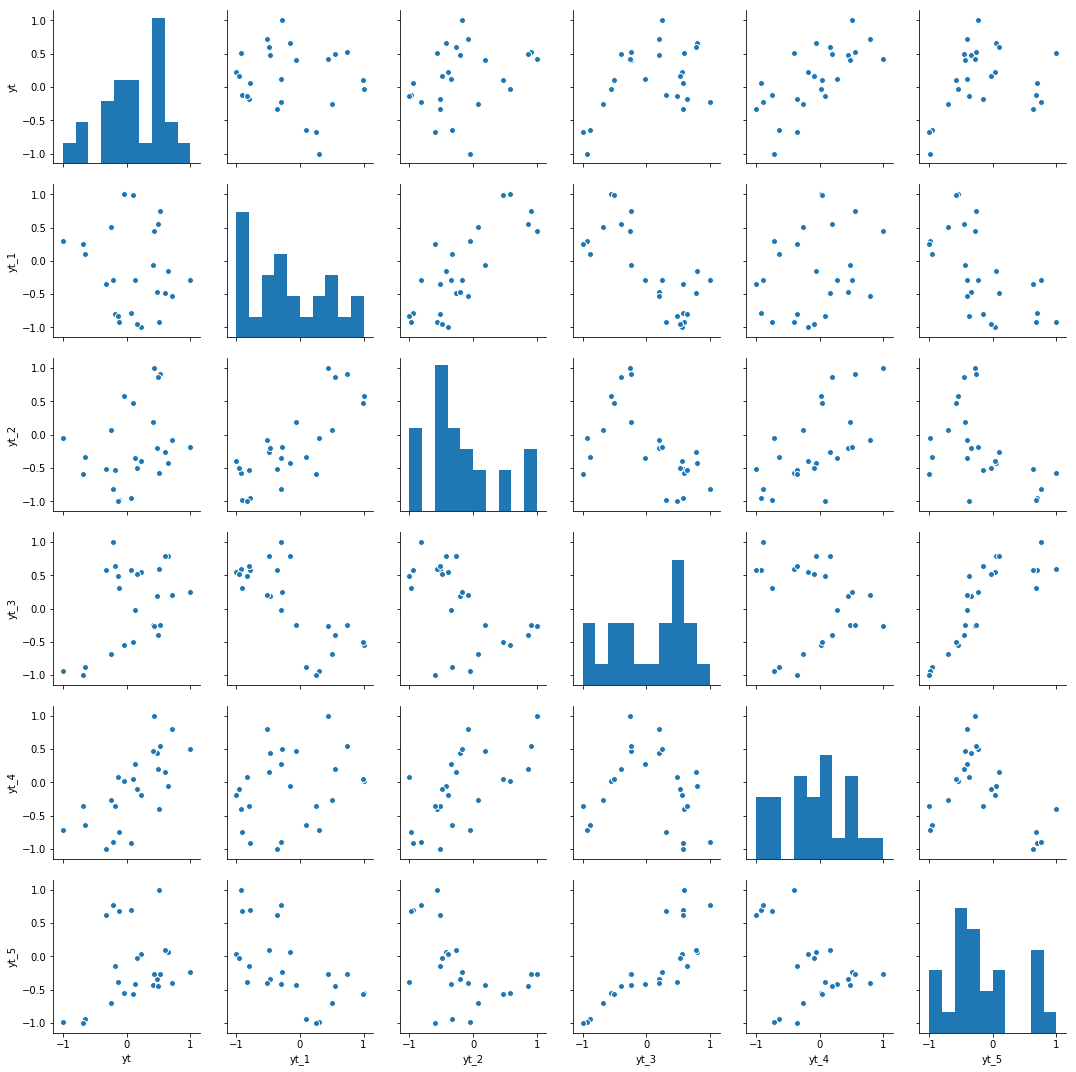

In [8]:
data2=pd.concat([yt,yt_1,yt_2,yt_3,yt_4,yt_5], axis=1)
data2.columns=['yt','yt_1','yt_2','yt_3','yt_4','yt_5']
data2.head(10)
sns.pairplot(data2)

In [9]:
cmap=sns.diverging_palette(0,10, as_cmap=True)

data2.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '1px', 'font-size': '0pt'})\
    .set_precision(10)\

,yt,yt_1,yt_2,yt_3,yt_4,yt_5
yt,1,-0.132093787,0.2915204462,0.4322398391,0.6957272055,0.2771912373
yt_1,-0.132093787,1,0.7925754535,-0.7465946798,0.2555151899,-0.5937429878
yt_2,0.2915204462,0.7925754535,1,-0.5365446636,0.6272047513,-0.465162332
yt_3,0.4322398391,-0.7465946798,-0.5365446636,1,-0.1310582384,0.8136960507
yt_4,0.6957272055,0.2555151899,0.6272047513,-0.1310582384,1,-0.3751395381
yt_5,0.2771912373,-0.5937429878,-0.465162332,0.8136960507,-0.3751395381,1


In [10]:
#dropping null values and assignining target values for y and training values for x
data2=data2.dropna()
y=data2['yt']
cols=['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
x=data2[cols]



In [11]:
#reshaping x data 
x=np.array(x).reshape((len(x),5))
y=np.array(y).reshape((len(y),1))


In [12]:
#the train set
train_end=12
x_train=x[0:train_end]
x_test=x[train_end+1:len(data2)]
y_train=y[0:train_end]
y_test=y[train_end+1:len(data2)]
x_train=x_train.reshape(x_train.shape+(1,))
x_test=x_test.reshape(x_test.shape+(1,))
x_train.shape

(12, 5, 1)

In [13]:
model1=Sequential()
model1.add(LSTM(activation='tanh',input_shape=(5,1),
                units=16,
              recurrent_activation='hard_sigmoid',
              ))
model1.add(Dropout(0.2))

model1.add(Dense(activation='tanh', units=8))
model1.add(Dense(activation='tanh', units=4))
model1.add(Dense(activation='tanh', units=2))


model1.add(Dense(activation='tanh', units=1))

model1.compile(loss="mean_squared_error", optimizer="rmsprop")

history=model1.fit(x_train, y_train, batch_size=1, epochs=40, validation_data=(x_test,y_test),shuffle=False)


Train on 12 samples, validate on 12 samples
Epoch 1/40
12/12 [==============================] - 2s 205ms/step - loss: 0.1381 - val_loss: 0.3147
Epoch 2/40
12/12 [==============================] - 0s 8ms/step - loss: 0.1266 - val_loss: 0.2958
Epoch 3/40
12/12 [==============================] - 0s 7ms/step - loss: 0.1163 - val_loss: 0.2790
Epoch 4/40
12/12 [==============================] - 0s 8ms/step - loss: 0.1090 - val_loss: 0.2606
Epoch 5/40
12/12 [==============================] - 0s 7ms/step - loss: 0.1043 - val_loss: 0.2407
Epoch 6/40
12/12 [==============================] - 0s 8ms/step - loss: 0.1035 - val_loss: 0.2235
Epoch 7/40
12/12 [==============================] - 0s 7ms/step - loss: 0.1073 - val_loss: 0.2092
Epoch 8/40
12/12 [==============================] - 0s 9ms/step - loss: 0.0895 - val_loss: 0.1898
Epoch 9/40
12/12 [==============================] - 0s 8ms/step - loss: 0.0820 - val_loss: 0.1714
Epoch 10/40
12/12 [==============================] - 0s 9ms/step - loss:

In [14]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 1,337
Trainable params: 1,337
Non-trainable params: 0
_________________________________________________________________


In [15]:
#predict using the model trained
pred1=model1.predict(x_test)

In [16]:
#append all the prediction and actual price into a list
act = []
pred = []

i=0
for i in range(len(x_test)):
    print('predicted:{0}, actual:{1}'.format(scaler_y.inverse_transform(pred1[i].reshape(-1,1)),scaler_y.inverse_transform(y_test[i].reshape(-1,1))))
    act.append(scaler_y.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[17.042673]], actual:[[17.92]]
predicted:[[16.488543]], actual:[[16.52]]
predicted:[[16.89086]], actual:[[16.97]]
predicted:[[17.327173]], actual:[[17.]]
predicted:[[17.303368]], actual:[[17.15]]
predicted:[[17.109844]], actual:[[17.1]]
predicted:[[16.920177]], actual:[[16.26]]
predicted:[[16.903563]], actual:[[16.48]]
predicted:[[15.939733]], actual:[[15.92]]
predicted:[[15.453343]], actual:[[15.28]]
predicted:[[15.474917]], actual:[[14.72]]
predicted:[[15.4520445]], actual:[[15.23]]


In [17]:
pred.append(pred1)


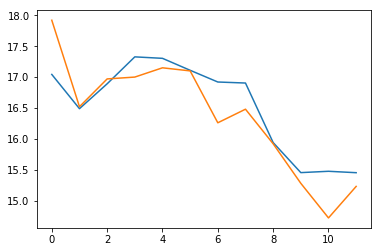

In [18]:
plt.plot(scaler_y.inverse_transform(pred1))
plt.plot(scaler_y.inverse_transform(y_test))

In [19]:
result_df = pd.DataFrame({'pred':list(np.reshape(scaler_y.inverse_transform(pred1.reshape(-1,1)), (-1))),'act':list(np.reshape(act, (-1)))})

In [20]:
err=(abs(result_df['pred']-result_df['act']))/result_df['act']

In [21]:
result_df['accuracy']=1-err

In [22]:
result_df

,pred,act,accuracy
0,17.042673,17.92,0.951042
1,16.488543,16.52,0.998096
2,16.890860,16.97,0.995336
3,17.327173,17.00,0.980755
4,17.303368,17.15,0.991057
5,17.109844,17.10,0.999424
6,16.920177,16.26,0.959399
7,16.903563,16.48,0.974298
8,15.939733,15.92,0.998761
9,15.453343,15.28,0.988656


In [23]:
model = Sequential()
model.add(Convolution1D(input_shape = (5, 1), 
                        filters=64,
                        kernel_size=2,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=2))

model.add(Convolution1D(input_shape = (5,1), 
                        filters=64,
                        kernel_size=1,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_size=1))

model.add(Convolution1D(input_shape = (5, 1), 
                        filters=64,
                        kernel_size=1,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(120))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('linear'))

model.compile(optimizer='adam', loss='mse')

history2=model.fit(x_train, y_train, batch_size=1, validation_data=(x_test,y_test), epochs=40,shuffle=False)


C:\Users\ms\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(5, 1), filters=64, kernel_size=2, activation="relu", strides=1, padding="valid")`
  import sys
C:\Users\ms\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
C:\Users\ms\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(5, 1), filters=64, kernel_size=1, activation="relu", strides=1, padding="valid")`
  from ipykernel import kernelapp as app
C:\Users\ms\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(5, 1), filters=64, kernel_size=1, activation="relu", strides=1, padding="valid")`


Train on 12 samples, validate on 12 samples
Epoch 1/40
12/12 [==============================] - 2s 132ms/step - loss: 0.1510 - val_loss: 0.3234
Epoch 2/40
12/12 [==============================] - 0s 3ms/step - loss: 0.1073 - val_loss: 0.3157
Epoch 3/40
12/12 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 0.2980
Epoch 4/40
12/12 [==============================] - 0s 3ms/step - loss: 0.1087 - val_loss: 0.2805
Epoch 5/40
12/12 [==============================] - 0s 3ms/step - loss: 0.0901 - val_loss: 0.2529
Epoch 6/40
12/12 [==============================] - 0s 4ms/step - loss: 0.0632 - val_loss: 0.2133
Epoch 7/40
12/12 [==============================] - 0s 4ms/step - loss: 0.0529 - val_loss: 0.1703
Epoch 8/40
12/12 [==============================] - 0s 4ms/step - loss: 0.0617 - val_loss: 0.1427
Epoch 9/40
12/12 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.1296
Epoch 10/40
12/12 [==============================] - 0s 4ms/step - loss:

In [24]:
pred2= model.predict(x_test)

Text(0.5, 1.0, 'loss vs val_loss RNN')

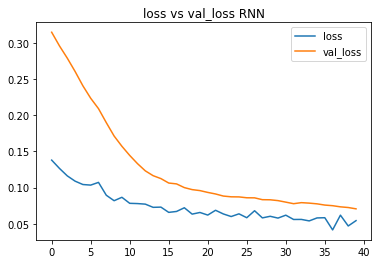

In [25]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss vs val_loss RNN')

Text(0.5, 1.0, 'loss vs val_loss RNN')

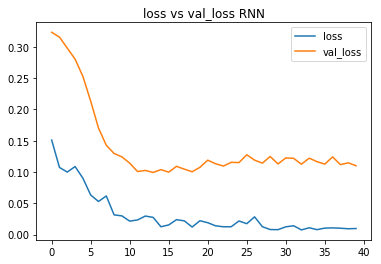

In [26]:
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss vs val_loss RNN')

Text(0.5, 1.0, 'RNN Prediction')

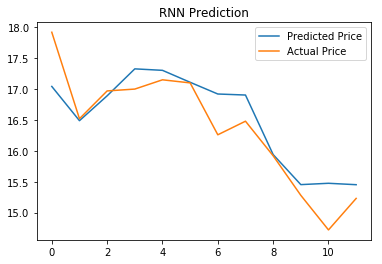

In [27]:
plt.plot(scaler_y.inverse_transform(pred1),label='Predicted Price')
plt.plot(scaler_y.inverse_transform(y_test),label='Actual Price')
plt.legend(loc='upper right')
plt.title("RNN Prediction")

Text(0.5, 1.0, 'CNN Prediction')

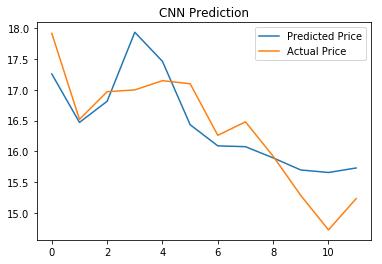

In [28]:
plt.plot(scaler_y.inverse_transform(pred2),label='Predicted Price')
plt.plot(scaler_y.inverse_transform(y_test),label='Actual Price')
plt.legend(loc='upper right')
plt.title("CNN Prediction")

In [29]:
result_df2 = pd.DataFrame({'pred':list(np.reshape(scaler_y.inverse_transform(pred2.reshape(-1,1)), (-1))),'act':list(np.reshape(act, (-1)))})

In [30]:
err2=(abs(result_df2['pred']-result_df2['act']))/result_df2['act']
result_df2['accuracy'] = 1-err2

In [31]:
result_df

,pred,act,accuracy
0,17.042673,17.92,0.951042
1,16.488543,16.52,0.998096
2,16.890860,16.97,0.995336
3,17.327173,17.00,0.980755
4,17.303368,17.15,0.991057
5,17.109844,17.10,0.999424
6,16.920177,16.26,0.959399
7,16.903563,16.48,0.974298
8,15.939733,15.92,0.998761
9,15.453343,15.28,0.988656


In [32]:
result_df2

,pred,act,accuracy
0,17.259184,17.92,0.963124
1,16.470448,16.52,0.997000
2,16.814283,16.97,0.990824
3,17.938540,17.00,0.944792
4,17.464127,17.15,0.981684
5,16.432949,17.10,0.960991
6,16.088682,16.26,0.989464
7,16.075211,16.48,0.975438
8,15.892690,15.92,0.998285
9,15.695872,15.28,0.972783


In [33]:
result_df['accuracy'].describe()

count    12.000000
mean      0.980913
std       0.018546
min       0.948715
25%       0.970573
50%       0.987038
75%       0.996026
max       0.999424
Name: accuracy, dtype: float64

In [34]:
result_df2['accuracy'].describe()

count    12.000000
mean      0.973177
std       0.019746
min       0.936481
25%       0.962591
50%       0.974110
75%       0.989804
max       0.998285
Name: accuracy, dtype: float64

Text(0.5, 1.0, 'RNN accuracy vs CNN accuracy ')

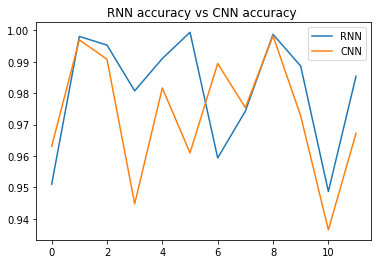

In [35]:
plt.plot(result_df['accuracy'],label="RNN")
plt.plot(result_df2['accuracy'], label ='CNN')
plt.legend(loc='upper right')
plt.title('RNN accuracy vs CNN accuracy ')